In [1]:
import requests
import json
import datetime as dt
import os
from dotenv import load_dotenv
import warnings
warnings.filterwarnings(action='ignore')
from pandas import read_csv,merge,concat,melt, read_excel, DataFrame
import sys
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.unicode_minus'] = False


In [2]:
url = "https://openapi.naver.com/v1/datalab/search"


In [3]:
load_dotenv(dotenv_path = '../../dot_env/.env')
clientId = os.environ.get("naverId")
clientSecret = os.environ.get("naverPw")

In [4]:
params  = {
    "startDate" : '2018-01-01',
    "endDate" : '2021-12-31',
    "timeUnit" : "date", # date: 일간, week: 주간, month: 월간
    "keywordGroups": [
        {
            "groupName": "제주도",  # 검색주제
            "keywords": ["제주도", "제주도 가볼만한곳", "제주도 맛집", "제주도 숙소", "제주도 날씨"]   # 주제와 관련된 검색어
        }
    ]
}


In [5]:
session = requests.Session()

session.headers.update({
    "Referer": "",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "X-Naver-Client-Id": clientId,
    "X-Naver-Client-Secret": clientSecret
})


In [6]:
try:
    r = session.post(url, data=json.dumps(params)) # json.dumps : 딕셔너리를 json으로 만들어주는 메서드
    
    if r.status_code != 200:
        msg = "[%d Error] %s 에러가 발생함" % (r.status_code, r.reason)
        raise Exception(msg)
except Exception as e:
    print("접속에 실패했습니다.")
    print(e)

In [7]:
r.encoding = "utf-8"
mydict = json.loads(r.text)

print("검색 결과 수 :", len(mydict['results']))
mydict

검색 결과 수 : 1


{'startDate': '2018-01-01',
 'endDate': '2021-12-31',
 'timeUnit': 'date',
 'results': [{'title': '제주도',
   'keywords': ['제주도', '제주도 가볼만한곳', '제주도 맛집', '제주도 숙소', '제주도 날씨'],
   'data': [{'period': '2018-01-01', 'ratio': 3.74699},
    {'period': '2018-01-02', 'ratio': 4.37243},
    {'period': '2018-01-03', 'ratio': 4.68352},
    {'period': '2018-01-04', 'ratio': 4.81123},
    {'period': '2018-01-05', 'ratio': 4.64442},
    {'period': '2018-01-06', 'ratio': 4.35965},
    {'period': '2018-01-07', 'ratio': 4.94306},
    {'period': '2018-01-08', 'ratio': 6.3536},
    {'period': '2018-01-09', 'ratio': 6.71582},
    {'period': '2018-01-10', 'ratio': 7.58714},
    {'period': '2018-01-11', 'ratio': 14.66291},
    {'period': '2018-01-12', 'ratio': 7.56905},
    {'period': '2018-01-13', 'ratio': 4.22511},
    {'period': '2018-01-14', 'ratio': 4.19164},
    {'period': '2018-01-15', 'ratio': 5.17714},
    {'period': '2018-01-16', 'ratio': 6.34894},
    {'period': '2018-01-17', 'ratio': 5.19642},
    

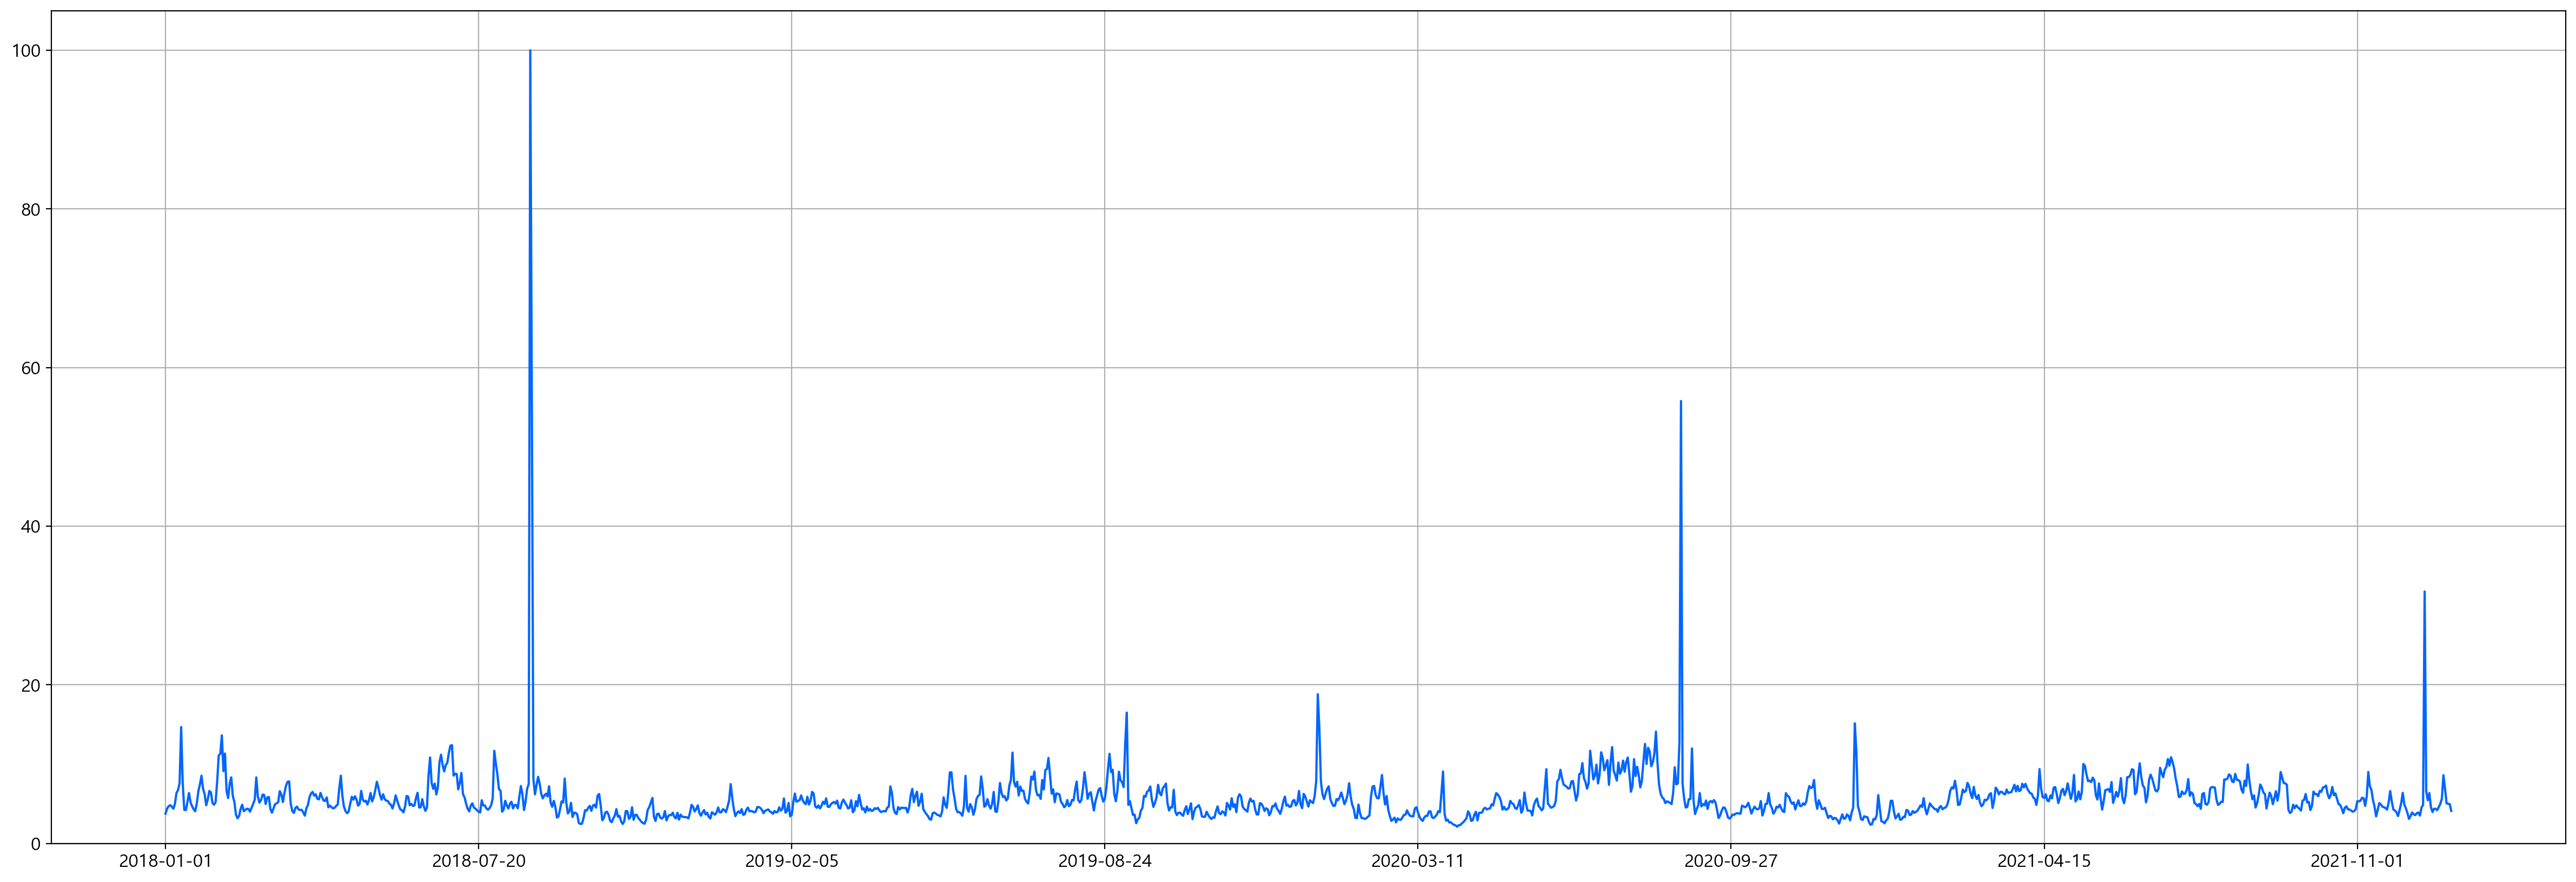

In [8]:
df = DataFrame(mydict['results'][0]['data'])
df.plot.line(x='period', y='ratio', color="#0066ff",figsize = (30,10), legend=False)
plt.xlabel('')
plt.ylim(0,105)
plt.grid()
plt.show()
plt.close()

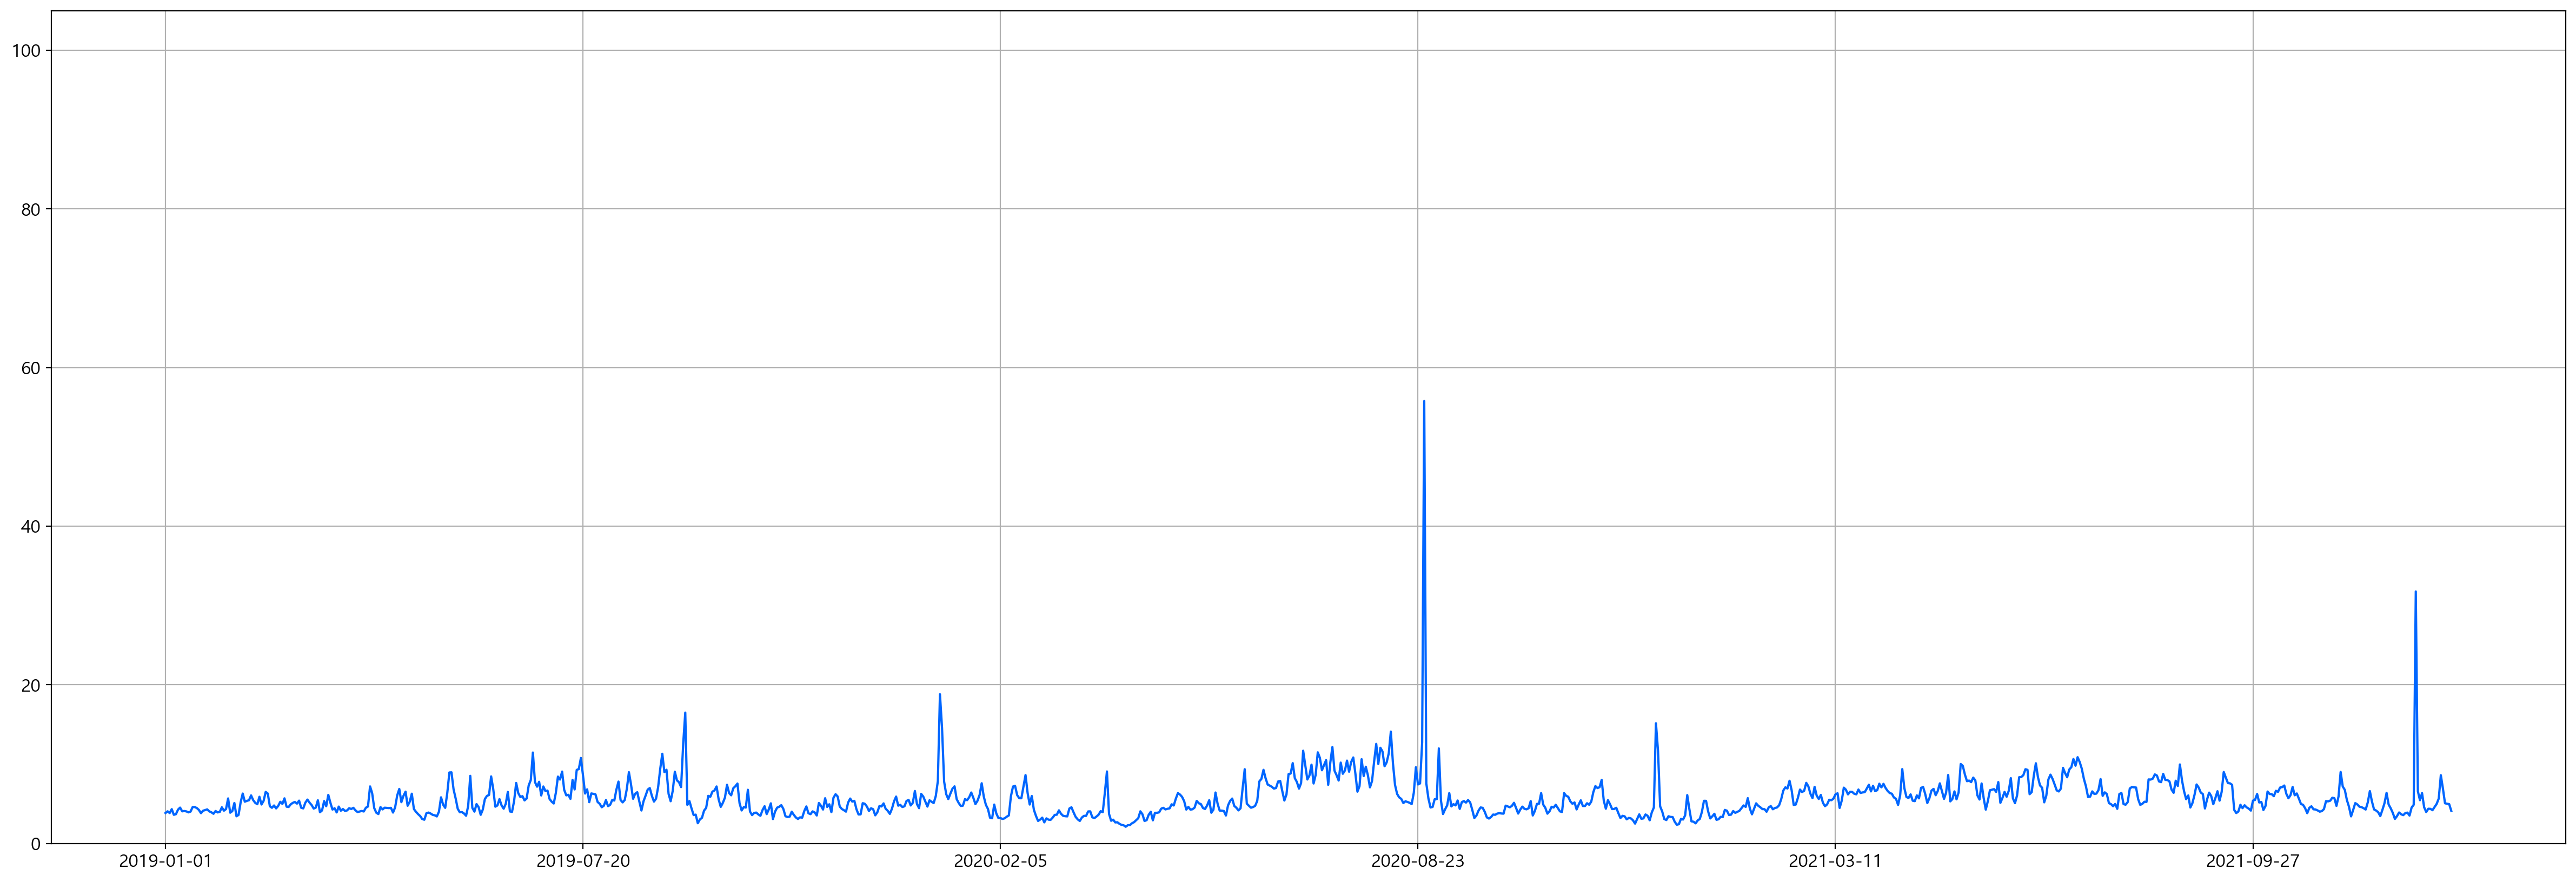

In [9]:
df.query('period >= "2019-01-01"').plot.line(x='period', y='ratio', color="#0066ff",figsize = (30,10), legend=False)
plt.xlabel('')
plt.grid()
plt.ylim(0,105)
plt.show()
plt.close()
